In [1]:
# tell jupyter where pyspark is
import findspark
findspark.init()
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc= SparkContext()
sqlContext = SQLContext(sc)
training_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('../.././data/pubg_kaggle/train_after_prepo.csv')
training_df.take(1)

[Row(_c0=0, Id='7f96b2f878858a', groupId='4d4b580de459be', matchId='a10357fd1a4a91', assists=0, boosts=0, damageDealt=0.0, DBNOs=0, headshotKills=0, heals=0, killPlace=60, killPoints=1241, kills=0, killStreaks=0, longestKill=0.0, matchDuration=1306, matchType='squad-fpp', maxPlace=28, numGroups=26, rankPoints=-1, revives=0, rideDistance=0.0, roadKills=0, swimDistance=0.0, teamKills=0, vehicleDestroys=0, walkDistance=244.8, weaponsAcquired=1, winPoints=1466, winPlacePerc=0.4443, moveDistance=244.8)]

In [2]:
import os
import sys

In [3]:
training_df.cache()
training_df.printSchema()
#onlynumber columns are chosen and convert from stringtype to int/double type
training_df_num = training_df.select(training_df.assists.cast("int"), training_df.boosts.cast("int"), \
                                     training_df.damageDealt.cast("double"), training_df.DBNOs.cast("int"),\
                                     training_df.headshotKills.cast("int"),training_df.heals.cast("int"),\
                                     training_df.killPlace.cast("int"),training_df.killPoints.cast("int"),\
                                     training_df.kills.cast("int"),training_df.killStreaks.cast("int"),\
                                     training_df.longestKill.cast("double"),training_df.matchDuration.cast("int"),\
                                     training_df.maxPlace.cast("int"),training_df.numGroups.cast("int"),\
                                     training_df.rankPoints.cast("int"),training_df.revives.cast("int"),\
                                     training_df.rideDistance.cast("double"),training_df.roadKills.cast("int"),\
                                     training_df.swimDistance.cast("double"),training_df.teamKills.cast("int"),\
                                     training_df.vehicleDestroys.cast("int"),training_df.walkDistance.cast("double"),\
                                     training_df.weaponsAcquired.cast("int"),training_df.winPoints.cast("int"),\
                                     training_df.winPlacePerc.cast("double"))

training_df_num.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- Id: string (nullable = true)
 |-- groupId: string (nullable = true)
 |-- matchId: string (nullable = true)
 |-- assists: integer (nullable = true)
 |-- boosts: integer (nullable = true)
 |-- damageDealt: double (nullable = true)
 |-- DBNOs: integer (nullable = true)
 |-- headshotKills: integer (nullable = true)
 |-- heals: integer (nullable = true)
 |-- killPlace: integer (nullable = true)
 |-- killPoints: integer (nullable = true)
 |-- kills: integer (nullable = true)
 |-- killStreaks: integer (nullable = true)
 |-- longestKill: double (nullable = true)
 |-- matchDuration: integer (nullable = true)
 |-- matchType: string (nullable = true)
 |-- maxPlace: integer (nullable = true)
 |-- numGroups: integer (nullable = true)
 |-- rankPoints: integer (nullable = true)
 |-- revives: integer (nullable = true)
 |-- rideDistance: double (nullable = true)
 |-- roadKills: integer (nullable = true)
 |-- swimDistance: double (nullable = true)
 |-- teamK

In [4]:
import pandas as pd
sampled_data = training_df_num.sample(False, 0.01).toPandas()

In [5]:
sampled_data.head(5)

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,0,96.75,0,0,0,88,1292,0,0,...,0,0.0,0,0.0,0,0,84.56,2,1417,0.0741
1,0,0,0.00,0,0,0,60,0,0,0,...,0,0.0,0,0.0,0,0,73.70,4,0,0.4255
2,1,0,60.20,0,0,0,92,1285,0,0,...,0,0.0,0,0.0,0,0,79.90,2,1428,0.0714
3,0,7,262.00,0,2,1,6,1299,3,1,...,0,4062.0,1,0.0,0,0,2520.00,7,1494,0.9443
4,0,0,24.52,0,0,0,89,1000,0,0,...,0,0.0,0,0.0,0,0,335.00,4,1500,0.0714


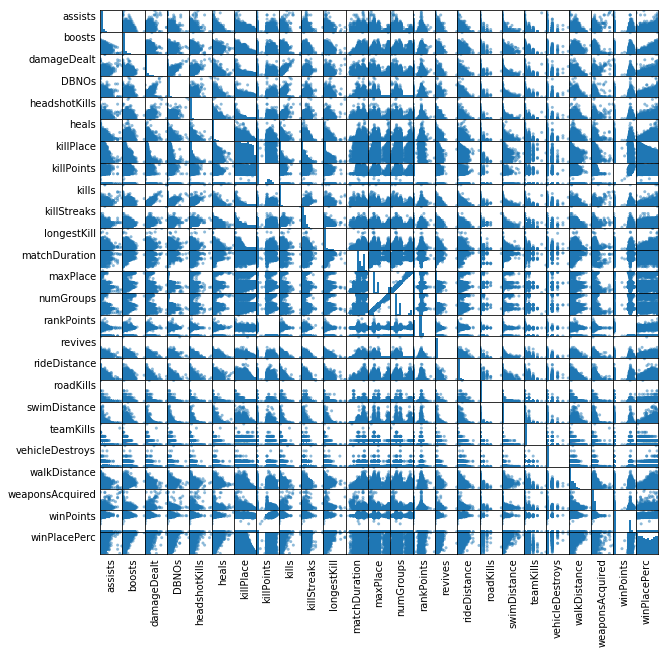

In [33]:
#Scatter matrix is a great way to roughly determine 
#if we have a linear correlation between multiple independent variables.
axs = pd.plotting.scatter_matrix(sampled_data,figsize=(10, 10))
n = len(sampled_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [7]:
#The correlation coefficient ranges from –1 to 1. 
#When it is close to 1, it means that there is a strong positive correlation; 
#When the coefficient is close to –1, it means that there is a strong negative correlation; 
#Finally, coefficients close to zero mean that there is no linear correlation.
import six
inputColumns = []
for i in training_df_num.columns:
    print(i);
    if not( isinstance(training_df_num.select(i).take(1)[0][0], six.string_types)):
        print( "Correlation to winPlacePerc for ", i, training_df_num.stat.corr('winPlacePerc',i))
        if abs(training_df_num.stat.corr('winPlacePerc',i)) > 0.2:
            inputColumns.append(i)
del inputColumns[-1]

assists
Correlation to winPlacePerc for  assists 0.29563776007189146
boosts
Correlation to winPlacePerc for  boosts 0.6322099626152509
damageDealt
Correlation to winPlacePerc for  damageDealt 0.4317406406134808
DBNOs
Correlation to winPlacePerc for  DBNOs 0.2702215755542792
headshotKills
Correlation to winPlacePerc for  headshotKills 0.27350372730975375
heals
Correlation to winPlacePerc for  heals 0.42353444902869153
killPlace
Correlation to winPlacePerc for  killPlace -0.7088061992284801
killPoints
Correlation to winPlacePerc for  killPoints 0.00963682660447797
kills
Correlation to winPlacePerc for  kills 0.41499464741875086
killStreaks
Correlation to winPlacePerc for  killStreaks 0.365553224769332
longestKill
Correlation to winPlacePerc for  longestKill 0.4070121802790827
matchDuration
Correlation to winPlacePerc for  matchDuration -0.004986998210082139
maxPlace
Correlation to winPlacePerc for  maxPlace 0.04284931156763115
numGroups
Correlation to winPlacePerc for  numGroups 0.043895

In [8]:
from pyspark.ml.feature import VectorAssembler
#vectorAssembler = VectorAssembler(inputCols = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace','numGroups','rankPoints','revives','rideDistance','roadKills','swimDistance','teamKills','vehicleDestroys','walkDistance','weaponsAcquired','winPoints'], outputCol = 'features')
print(inputColumns)
vectorAssembler = VectorAssembler(inputCols = inputColumns, outputCol = 'features')
vtraining_df = vectorAssembler.transform(training_df_num)
vtraining_df = vtraining_df.select(['features', 'winPlacePerc'])
vtraining_df.show(3)

['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'kills', 'killStreaks', 'longestKill', 'revives', 'rideDistance', 'walkDistance', 'weaponsAcquired']
+--------------------+------------+
|            features|winPlacePerc|
+--------------------+------------+
|(14,[6,12,13],[60...|      0.4443|
|(14,[2,6,11,12,13...|        0.64|
|(14,[0,2,6,12,13]...|      0.7754|
+--------------------+------------+
only showing top 3 rows



In [9]:
print(vtraining_df)
vtraining_df.show(3,False)

DataFrame[features: vector, winPlacePerc: double]
+-------------------------------------------------+------------+
|features                                         |winPlacePerc|
+-------------------------------------------------+------------+
|(14,[6,12,13],[60.0,244.8,1.0])                  |0.4443      |
|(14,[2,6,11,12,13],[91.5,57.0,0.0045,1434.0,5.0])|0.64        |
|(14,[0,2,6,12,13],[1.0,68.0,47.0,161.8,2.0])     |0.7754      |
+-------------------------------------------------+------------+
only showing top 3 rows



In [10]:
splits = vtraining_df.randomSplit([0.7, 0.3])
train_df = splits[0]
test_df = splits[1]

In [11]:
from pyspark.ml.linalg import SparseVector, DenseVector
from pyspark.ml.linalg import Vectors
from pyspark.sql import SparkSession
from pyspark.sql import Row
#spark = SparkSession.builder.appName("project").getOrCreate()
#fdf = map(lambda x: (Vectors.dense(x)),vtraining_df.select("features"))
#print(fdf)
#mydf = spark.createDataFrame(fdf,schema = "features")
from pyspark.sql.types import Row
rdd = train_df.rdd.map(lambda x: Row(winPlacePerc=x[1],features=DenseVector(x[0].toArray())))
df=sqlContext.createDataFrame(rdd)
print(df)
df.show(5,False)
   

DataFrame[features: vector, winPlacePerc: double]
+---------------------------------------------------------------+------------+
|features                                                       |winPlacePerc|
+---------------------------------------------------------------+------------+
|[3.0,1.0,320.0,1.0,0.0,5.0,46.0,0.0,0.0,0.0,1.0,0.0,0.0,8.0]   |0.1         |
|[1.0,1.0,5.92,1.0,0.0,7.0,63.0,0.0,0.0,0.0,0.0,0.0,668.0,2.0]  |0.3845      |
|[1.0,1.0,7.953,1.0,0.0,1.0,54.0,0.0,0.0,0.0,0.0,0.0,1881.0,3.0]|0.5864      |
|[1.0,1.0,10.0,1.0,0.0,3.0,44.0,0.0,0.0,0.0,0.0,0.0,1277.0,3.0] |0.852       |
|[1.0,1.0,10.08,1.0,0.0,1.0,57.0,0.0,0.0,0.0,0.0,0.0,3822.0,6.0]|0.69        |
+---------------------------------------------------------------+------------+
only showing top 5 rows



In [12]:
#LinearRegression
from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol = 'features', labelCol='winPlacePerc', maxIter=10000, regParam=0.3, elasticNetParam=0.8)
lr_model = lr.fit(df)
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.7265716373943154e-06,0.0]
Intercept: 0.47740103911528575


In [13]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 0.299897
r2: 0.023280


In [14]:
train_df.describe().show()

+-------+-------------------+
|summary|       winPlacePerc|
+-------+-------------------+
|  count|            3053833|
|   mean| 0.4817881229916156|
| stddev|0.30345019901809456|
|    min|                0.0|
|    max|                1.0|
+-------+-------------------+



In [18]:
lr_model.save('linearRegressionModel')

In [19]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","winPlacePerc","features").show(20)
from pyspark.ml.evaluation import RegressionEvaluator
lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="winPlacePerc",metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+-------------------+------------+--------------------+
|         prediction|winPlacePerc|            features|
+-------------------+------------+--------------------+
| 0.4789848320611783|      0.1852|(14,[0,1,2,3,5,6,...|
| 0.4843175560742896|      0.7085|(14,[0,1,2,3,5,6,...|
| 0.4827822085596831|       0.615|(14,[0,1,2,3,5,6,...|
| 0.4839970709134737|      0.6787|(14,[0,1,2,3,5,6,...|
| 0.4786934141591341|        0.25|(14,[0,1,2,3,5,6,...|
| 0.4795140052336883|      0.6294|(14,[0,1,2,3,5,6,...|
|0.48634481104503213|      0.9033|(14,[0,1,2,3,5,6,...|
|0.48835715972922505|      0.8076|(14,[0,1,2,3,5,6,...|
| 0.4786822344442219|      0.3572|(14,[0,1,2,3,5,6,...|
|0.47851230277755674|      0.1923|(14,[0,1,2,3,5,6,...|
| 0.4784016235999261|      0.4443|(14,[0,1,2,3,5,6,...|
| 0.4849697061108336|      0.5386|(14,[0,1,2,3,5,6,...|
| 0.4803133548499094|      0.4075|(14,[0,1,2,3,5,6,...|
|0.48509268297486763|      0.5767|(14,[0,1,2,3,5,6,...|
|0.48133629876437417|       0.423|(14,[0,1,2,3,5

In [20]:
test_result = lr_model.evaluate(test_df)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 0.300137


In [21]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 23
objectiveHistory: [0.5, 0.49996505197653496, 0.49990633368090304, 0.49988529700071554, 0.49987776030523523, 0.49987506017487904, 0.4998740928140565, 0.49987374624302583, 0.4998736220789324, 0.49987357759534684, 0.49987356165845803, 0.4998735559488369, 0.49987355390328175, 0.4998735531704323, 0.4998735529078781, 0.4998735528138149, 0.49987355278011497, 0.4998735527680414, 0.49987355276371603, 0.49987355276216616, 0.4998735527616114, 0.4998735527614125, 0.49987355276134093]
+--------------------+
|           residuals|
+--------------------+
| -0.3774010391152858|
|-0.09539038896906515|
| 0.10198927963477555|
| 0.36984012890376167|
|  0.1983560040865931|
|  0.3048570632239763|
| -0.2452413700363284|
| 0.14370842009527457|
| 0.20729241073858284|
| 0.10784188235768277|
| -0.2650823293747705|
|-0.26484755536161464|
|-0.36232733772785597|
|-0.05088481009479878|
| 0.16946257619910415|
|-0.12324549123150902|
|  0.1416987168789563|
|-0.03493376704655632|
|  0.4388854322480509|

In [22]:
predictions = lr_model.transform(test_df)
predictions.select("prediction","winPlacePerc","features").show()

+-------------------+------------+--------------------+
|         prediction|winPlacePerc|            features|
+-------------------+------------+--------------------+
| 0.4789848320611783|      0.1852|(14,[0,1,2,3,5,6,...|
| 0.4843175560742896|      0.7085|(14,[0,1,2,3,5,6,...|
| 0.4827822085596831|       0.615|(14,[0,1,2,3,5,6,...|
| 0.4839970709134737|      0.6787|(14,[0,1,2,3,5,6,...|
| 0.4786934141591341|        0.25|(14,[0,1,2,3,5,6,...|
| 0.4795140052336883|      0.6294|(14,[0,1,2,3,5,6,...|
|0.48634481104503213|      0.9033|(14,[0,1,2,3,5,6,...|
|0.48835715972922505|      0.8076|(14,[0,1,2,3,5,6,...|
| 0.4786822344442219|      0.3572|(14,[0,1,2,3,5,6,...|
|0.47851230277755674|      0.1923|(14,[0,1,2,3,5,6,...|
| 0.4784016235999261|      0.4443|(14,[0,1,2,3,5,6,...|
| 0.4849697061108336|      0.5386|(14,[0,1,2,3,5,6,...|
| 0.4803133548499094|      0.4075|(14,[0,1,2,3,5,6,...|
|0.48509268297486763|      0.5767|(14,[0,1,2,3,5,6,...|
|0.48133629876437417|       0.423|(14,[0,1,2,3,5

In [23]:
#decision tree
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'winPlacePerc')
dt_model = dt.fit(train_df)
dt_predictions = dt_model.transform(test_df)
dt_evaluator = RegressionEvaluator(
    labelCol="winPlacePerc", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.121661


In [24]:
dt_predictions.select('prediction', 'winPlacePerc', 'features').show(50)

+-------------------+------------+--------------------+
|         prediction|winPlacePerc|            features|
+-------------------+------------+--------------------+
|0.18535287330783323|      0.1852|(14,[0,1,2,3,5,6,...|
| 0.7182499053051918|      0.7085|(14,[0,1,2,3,5,6,...|
| 0.5458809989843869|       0.615|(14,[0,1,2,3,5,6,...|
| 0.6736913492764826|      0.6787|(14,[0,1,2,3,5,6,...|
| 0.3060119496462417|        0.25|(14,[0,1,2,3,5,6,...|
|0.40188346953708626|      0.6294|(14,[0,1,2,3,5,6,...|
|  0.765936788107081|      0.9033|(14,[0,1,2,3,5,6,...|
| 0.8370567985368746|      0.8076|(14,[0,1,2,3,5,6,...|
| 0.3060119496462417|      0.3572|(14,[0,1,2,3,5,6,...|
| 0.3649478451441134|      0.1923|(14,[0,1,2,3,5,6,...|
|0.32729413010389696|      0.4443|(14,[0,1,2,3,5,6,...|
| 0.6572356378056696|      0.5386|(14,[0,1,2,3,5,6,...|
| 0.3649478451441134|      0.4075|(14,[0,1,2,3,5,6,...|
| 0.6572356378056696|      0.5767|(14,[0,1,2,3,5,6,...|
| 0.5630655253222205|       0.423|(14,[0,1,2,3,5

In [25]:
dt_evaluator = RegressionEvaluator(
    labelCol="winPlacePerc", predictionCol="prediction", metricName="rmse")
rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 0.121661


In [26]:
dt_model.featureImportances

SparseVector(14, {1: 0.0058, 3: 0.0052, 6: 0.1738, 7: 0.0089, 12: 0.8063})

In [27]:
training_df.take(1)

[Row(_c0=0, Id='7f96b2f878858a', groupId='4d4b580de459be', matchId='a10357fd1a4a91', assists=0, boosts=0, damageDealt=0.0, DBNOs=0, headshotKills=0, heals=0, killPlace=60, killPoints=1241, kills=0, killStreaks=0, longestKill=0.0, matchDuration=1306, matchType='squad-fpp', maxPlace=28, numGroups=26, rankPoints=-1, revives=0, rideDistance=0.0, roadKills=0, swimDistance=0.0, teamKills=0, vehicleDestroys=0, walkDistance=244.8, weaponsAcquired=1, winPoints=1466, winPlacePerc=0.4443, moveDistance=244.8)]

In [28]:
dt_model.save("decisionTreeModel")

In [ ]:
#Gradient boosted tree
from pyspark.ml.regression import GBTRegressor
gbt = GBTRegressor(featuresCol = 'features', labelCol = 'winPlacePerc', maxIter=100)
gbt_model = gbt.fit(train_df)
gbt_predictions = gbt_model.transform(test_df)
gbt_predictions.select('prediction', 'winPlacePerc', 'features').show(50)

In [ ]:
gbt_evaluator = RegressionEvaluator(
    labelCol="winPlacePerc", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

In [ ]:
gbt_model.save('gradientBoostedTree')